# Datos de EPM

## Librerias


In [83]:
# Librarias para procesar datos
import pandas as pd
import numpy as np

from datetime import datetime
import urllib.request


# Librearías de gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Librerias para modelo ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Comprobar la estacionariedad de la serie
from statsmodels.tsa.stattools import adfuller

import matplotlib.dates as mdates

from scipy import stats
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, SimpleRNN
from sklearn.preprocessing import MinMaxScaler

from utils.DataPreparationRNN import create_dataset


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import math

## Cargando datos

In [2]:
df_ = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)


In [26]:
df = pd.read_parquet("datos_procesados/df_energia_epm.parquet")
df.index = df['date']

In [28]:
df.head()

,activa_consumo,activa_generación,reactiva_capacitiva,reactiva_inductiva,date
date,,,,,
2020-02-16,4948.0,0.0,0.0,1382.0,2020-02-16
2020-02-17,14400.0,0.0,0.0,7072.0,2020-02-17
2020-02-18,14896.0,0.0,0.0,7640.0,2020-02-18
2020-02-19,14976.0,0.0,0.0,7800.0,2020-02-19
2020-02-20,16104.0,0.0,0.0,8376.0,2020-02-20


In [27]:
reactiva_inductiva = df['reactiva_inductiva']
reactiva_inductiva

date
2020-02-16     1382.0
2020-02-17     7072.0
2020-02-18     7640.0
2020-02-19     7800.0
2020-02-20     8376.0
               ...   
2024-09-25    10616.0
2024-09-26    11336.0
2024-09-27    11152.0
2024-09-28    10888.0
2024-09-29    10112.0
Name: reactiva_inductiva, Length: 1668, dtype: float16

In [33]:
t = ''
j = 1
for i in list(reactiva_inductiva):
    t = t+ f" ({j},{i})"
    j+=1
t

' (1,1382.0) (2,7072.0) (3,7640.0) (4,7800.0) (5,8376.0) (6,7248.0) (7,6356.0) (8,6372.0) (9,7604.0) (10,7964.0) (11,7540.0) (12,7364.0) (13,6984.0) (14,6724.0) (15,4940.0) (16,7572.0) (17,7676.0) (18,7932.0) (19,7268.0) (20,7400.0) (21,6924.0) (22,4876.0) (23,7688.0) (24,8176.0) (25,7768.0) (26,7944.0) (27,7508.0) (28,7616.0) (29,5844.0) (30,7092.0) (31,6884.0) (32,7468.0) (33,6992.0) (34,6372.0) (35,6476.0) (36,5724.0) (37,6872.0) (38,6668.0) (39,6752.0) (40,6768.0) (41,6504.0) (42,6188.0) (43,5376.0) (44,6388.0) (45,6776.0) (46,6672.0) (47,7508.0) (48,6980.0) (49,5796.0) (50,6596.0) (51,7164.0) (52,7504.0) (53,7140.0) (54,6948.0) (55,6740.0) (56,6972.0) (57,6008.0) (58,7296.0) (59,6968.0) (60,6760.0) (61,7428.0) (62,6256.0) (63,6432.0) (64,5172.0) (65,7128.0) (66,6780.0) (67,6976.0) (68,7068.0) (69,7056.0) (70,6628.0) (71,6932.0) (72,7276.0) (73,8072.0) (74,7700.0) (75,6556.0) (76,7600.0) (77,5996.0) (78,6264.0) (79,7804.0) (80,8280.0) (81,7208.0) (82,7468.0) (83,7744.0) (84,8132.0)

In [5]:
result = adfuller(reactiva_inductiva.dropna())
print('ADF Statistic is: %f' % result[0])
print('p-value is: %f' % result[1])

ADF Statistic is: -2.512916
p-value is: 0.112363


In [29]:
289+50




339

In [70]:
# ## Gráficando la serie 
# plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
# N = len(df_.value)
# umbral = 1.96 / np.sqrt(N)
# fig, axes = plt.subplots(3,2, sharex=True)
# axes[0,0].plot(df_.value); axes[0,0].set_title('Serie Original')
# plot_acf(df_.value, ax=axes[0,1])
# axes[0, 1].hlines([umbral, -umbral], xmin=0, xmax=len(df_.value), colors='red', linestyles='dashed')
# axes[0, 1].set_title('ACF con Umbral de Significancia')

# plt.show()

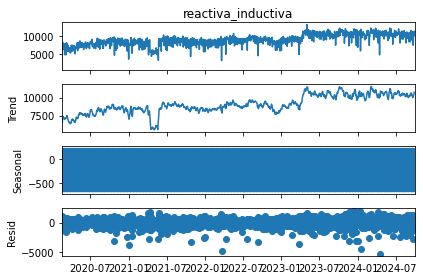

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose


reactiva_inductiva.index = pd.to_datetime(reactiva_inductiva.index)

# Prueba con diferentes periodos para observar la estacionalidad
# Por ejemplo, para detectar estacionalidad semanal (m=7)
decomposition = seasonal_decompose(reactiva_inductiva, model='additive', period=7)
decomposition.plot()
plt.show()

In [7]:
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.graphics.tsaplots import acf, pacf
import pandas as pd

# Suponiendo que reactiva_inductiva es un DataFrame o Serie de pandas
# Crear el gráfico de la serie original
fig_original = px.line(reactiva_inductiva, title='Serie Original')
fig_original.update_xaxes(title_text='Tiempo')
fig_original.update_yaxes(title_text='Valor')

N = len(reactiva_inductiva)
umbral = 1.96 / np.sqrt(N)

# Calcular los valores de ACF
acf_values = acf(reactiva_inductiva, fft=True)
lags = list(range(len(acf_values)))

# Crear el gráfico de ACF
fig_acf = go.Figure()
fig_acf.add_trace(go.Bar(x=lags, y=acf_values, name='ACF'))
fig_acf.update_layout(title='Función de Autocorrelación (ACF)')
fig_acf.update_xaxes(title_text='Lags')
fig_acf.update_yaxes(title_text='Autocorrelación')
# Añadir las líneas de umbral de significancia
fig_acf.add_shape(type="line", x0=0, y0=umbral, x1=len(acf_values), y1=umbral,
                  line=dict(color="red", dash="dash"), name="Umbral Superior")
fig_acf.add_shape(type="line", x0=0, y0=-umbral, x1=len(acf_values), y1=-umbral,
                  line=dict(color="red", dash="dash"), name="Umbral Inferior")


# pacf
pacf_values = pacf(reactiva_inductiva, nlags=40)
lags_pacf = list(range(len(pacf_values)))
# Crear el gráfico de PACF
fig_pacf = go.Figure()
fig_pacf.add_trace(go.Bar(x=lags_pacf, y=pacf_values, name='PACF'))
fig_pacf.update_layout(title='Función de Autocorrelación Parcial (PACF)')
fig_pacf.update_xaxes(title_text='Lags')
fig_pacf.update_yaxes(title_text='Autocorrelación Parcial')
# Añadir las líneas de umbral de significancia
fig_pacf.add_shape(type="line", x0=0, y0=umbral, x1=len(pacf_values), y1=umbral, line=dict(color="red", dash="dash"), name="Umbral Superior")
fig_pacf.add_shape(type="line", x0=0, y0=-umbral, x1=len(pacf_values), y1=-umbral, line=dict(color="red", dash="dash"), name="Umbral Inferior")

# Crear el gráfico de Differenciacion
reactiva_inductiva_diff = reactiva_inductiva.diff()
fig_original_diff = px.line(reactiva_inductiva_diff, title='Serie Original Diferenciada')
fig_original_diff.update_xaxes(title_text='Tiempo')
fig_original_diff.update_yaxes(title_text='Valor')

# Gráfico de ACF 
acf_values_diff = acf(reactiva_inductiva_diff.dropna(), fft=True)
lags_diff = list(range(len(acf_values_diff)))
fig_acf_diff = go.Figure()
fig_acf_diff.add_trace(go.Bar(x=lags_diff, y=acf_values_diff, name='ACF'))
fig_acf_diff.update_layout(title='Función de Autocorrelación (ACF) Diferenciada')
fig_acf_diff.update_xaxes(title_text='Lags')
fig_acf_diff.update_yaxes(title_text='Autocorrelación')
# Añadir las líneas de umbral de significancia
fig_acf_diff.add_shape(type="line", x0=0, y0=umbral, x1=len(acf_values), y1=umbral,
                  line=dict(color="red", dash="dash"), name="Umbral Superior")
fig_acf_diff.add_shape(type="line", x0=0, y0=-umbral, x1=len(acf_values), y1=-umbral,
                  line=dict(color="red", dash="dash"), name="Umbral Inferior")


# pacf
pacf_diff = pacf(reactiva_inductiva_diff, nlags=40)
lags_pacf_diff = list(range(len(pacf_diff)))
# Crear el gráfico de PACF
fig_pacf_diff = go.Figure()
fig_pacf_diff.add_trace(go.Bar(x=lags_pacf_diff, y=pacf_diff, name='PACF'))
fig_pacf_diff.update_layout(title='Función de Autocorrelación Parcial (PACF)')
fig_pacf_diff.update_xaxes(title_text='Lags')
fig_pacf_diff.update_yaxes(title_text='Autocorrelación Parcial')
# Añadir las líneas de umbral de significancia
fig_pacf_diff.add_shape(type="line", x0=0, y0=umbral, x1=len(pacf_diff), y1=umbral, line=dict(color="red", dash="dash"), name="Umbral Superior")
fig_pacf_diff.add_shape(type="line", x0=0, y0=-umbral, x1=len(pacf_diff), y1=-umbral, line=dict(color="red", dash="dash"), name="Umbral Inferior")

# Crear el gráfico de la segunda Differenciacion
reactiva_inductiva_2diff = reactiva_inductiva.diff().diff()
fig_original_2diff = px.line(reactiva_inductiva_2diff, title='Serie Original Diferenciada')
fig_original_2diff.update_xaxes(title_text='Tiempo')
fig_original_2diff.update_yaxes(title_text='Valor')

# Gráfico de ACF 
acf_values_2diff = acf(reactiva_inductiva_2diff.dropna(), fft=True)
lags_2diff = list(range(len(acf_values_2diff)))
fig_acf_2diff = go.Figure()
fig_acf_2diff.add_trace(go.Bar(x=lags_2diff, y=acf_values_2diff, name='ACF'))
fig_acf_2diff.update_layout(title='Función de Autocorrelación (ACF) segunda Diferenciación')
fig_acf_2diff.update_xaxes(title_text='Lags')
fig_acf_2diff.update_yaxes(title_text='Autocorrelación')
# Añadir las líneas de umbral de significancia
fig_acf_2diff.add_shape(type="line", x0=0, y0=umbral, x1=len(acf_values), y1=umbral,
                  line=dict(color="red", dash="dash"), name="Umbral Superior")
fig_acf_2diff.add_shape(type="line", x0=0, y0=-umbral, x1=len(acf_values), y1=-umbral,
                  line=dict(color="red", dash="dash"), name="Umbral Inferior")

# Mostrar ambos gráficos
fig_original.show()
fig_acf.show()
fig_pacf.show()
fig_original_diff.show()
fig_acf_diff.show()
fig_pacf_diff.show()
fig_original_2diff.show()
fig_acf_2diff.show()


In [27]:
result_diff = adfuller(reactiva_inductiva_diff.dropna())
print('ADF Statistic is: %f' % result_diff[0])
print('p-value is: %f' % result_diff[1])

result_2diff = adfuller(reactiva_inductiva_2diff.dropna())
print('ADF Statistic is: %f' % result_2diff[0])
print('p-value is: %f' % result_2diff[1])

ADF Statistic is: -10.202827
p-value is: 0.000000
ADF Statistic is: -17.376236
p-value is: 0.000000


In [28]:
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.graphics.tsaplots import acf
import numpy as np

# Suponiendo que reactiva_inductiva es un DataFrame o Serie de pandas
# Calcular los valores de ACF
acf_values = acf(reactiva_inductiva, fft=True)
lags = list(range(len(acf_values)))

# Calcular el umbral de significancia
N = len(reactiva_inductiva)
umbral = 1.96 / np.sqrt(N)

# Crear el gráfico de ACF con umbral
fig_acf = go.Figure()

# Añadir las barras de autocorrelación
fig_acf.add_trace(go.Bar(x=lags, y=acf_values, name='ACF'))

# Añadir las líneas de umbral de significancia
fig_acf.add_shape(type="line", x0=0, y0=umbral, x1=len(acf_values), y1=umbral,
                  line=dict(color="red", dash="dash"), name="Umbral Superior")
fig_acf.add_shape(type="line", x0=0, y0=-umbral, x1=len(acf_values), y1=-umbral,
                  line=dict(color="red", dash="dash"), name="Umbral Inferior")

# Configuración de títulos y etiquetas
fig_acf.update_layout(title='Función de Autocorrelación (ACF) con Umbral de Significancia')
fig_acf.update_xaxes(title_text='Lags')
fig_acf.update_yaxes(title_text='Autocorrelación')

# Mostrar el gráfico
fig_acf.show()


In [10]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima.model import ARIMA  # Nota: en versiones recientes, se usa `tsa.arima.model`
import pmdarima as pm

train = reactiva_inductiva[:'2023']
test = reactiva_inductiva['2024':]

In [15]:
reactiva_inductiva.values

array([ 1382.,  7072.,  7640., ..., 11152., 10888., 10112.], dtype=float16)

In [17]:
model = pm.auto_arima(reactiva_inductiva.values, 
                      start_p=1, start_q=1,
                      test='adf',       # Use adftest to find optimal 'd'
                      max_p=10, max_q=10, # Maximum p and q
                      m=7,              # Frequency of series
                      d=1,           # Let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True
        )
print(model.summary())

/home/javier/.local/lib/python3.10/site-packages/pmdarima/arima/_validation.py:62: UserWarning:

m (7) set for non-seasonal fit. Setting to 0



Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=27291.402, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=27988.625, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=27715.341, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=27326.353, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=27986.666, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=27291.084, Time=0.60 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=27614.420, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=27278.213, Time=0.68 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=27548.455, Time=0.09 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=27254.179, Time=0.99 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=27478.877, Time=0.13 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=27221.671, Time=0.79 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=27387.565, Time=0.18 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=27024.933, Time=0.73 sec
 ARIMA(6,1,0)(0,0,0

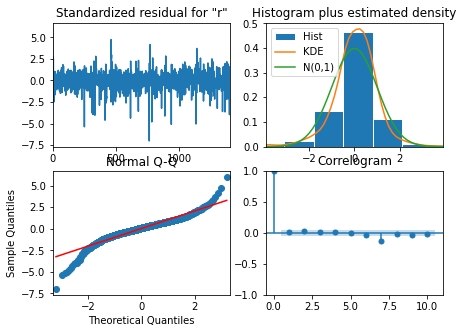

In [46]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA  # Nueva importación

# Importar los dat

# Construir el modelo ARIMA y ajustarlo a los datos de entrenamiento
model = ARIMA(train, order=(7, 1, 0))
model_fit = model.fit()  # Ajustar el modelo

# Visualizar los gráficos de diagnóstico
model_fit.plot_diagnostics(figsize=(7, 5))
plt.show()


Panel Superior Izquierdo - Residuos Estandarizados

Muestra los residuos estandarizados del modelo a lo largo del tiempo.

Los residuos están aproximadamente centrados en cero y no muestran patrones evidentes, lo cual es una buena señal de que el modelo está capturando bien la estructura de la serie temporal.
Aunque hay algunos valores atípicos (picos hacia arriba y hacia abajo), en general, los residuos parecen estar distribuidos de forma aleatoria.


Panel Superior Derecho - Histograma de Residuos con Densidad Estimada

Este gráfico presenta el histograma de los residuos junto con la densidad estimada de Kernel (KDE) y la curva teórica de una distribución normal  N(0,1)
N(0,1).

La forma de la distribución de los residuos se asemeja a una distribución normal, aunque las colas son un poco más gruesas, lo que indica que hay más valores extremos de lo que se esperaría en una distribución perfectamente normal.

La curva KDE (naranja) sigue de cerca la curva normal (verde), lo cual es positivo, pero las colas indican que los residuos podrían tener un comportamiento ligeramente no normal.

Panel Inferior Izquierdo - Gráfico Q-Q (Quantile-Quantile)

Este gráfico compara los cuantiles de los residuos con los cuantiles teóricos de una distribución normal.

Si los residuos fueran perfectamente normales, los puntos deberían alinearse con la línea roja.

En este caso, los puntos están bastante alineados con la línea, aunque hay desviaciones en las colas (especialmente en los extremos), lo cual sugiere que los residuos tienen colas más gruesas de lo normal. Esto significa que existen valores extremos que no siguen una distribución normal perfecta.

Panel Inferior Derecho - Correlograma de Residuos

Muestra la autocorrelación de los residuos en diferentes retardos (lags).
En un buen modelo ARIMA/SARIMA, no debería haber autocorrelación significativa en los residuos, es decir, los puntos deberían estar dentro de las bandas de confianza.
En este gráfico, todos los puntos están dentro del intervalo de confianza, lo cual indica que no hay autocorrelación significativa en los residuos. Esto es una buena señal, ya que sugiere que el modelo ha capturado adecuadamente la dependencia temporal de la serie y que los residuos se comportan como ruido blanco.

Conclusión General

Normalidad de los Residuos: Los residuos son aproximadamente normales, aunque con algunas colas gruesas, lo que podría ser aceptable dependiendo de la aplicación.
Autocorrelación de los Residuos: No se observa autocorrelación significativa en los residuos, lo que indica que el modelo ha capturado adecuadamente la estructura de autocorrelación de la serie temporal.
Valores Atípicos: Algunos valores extremos en los residuos podrían indicar anomalías en la serie original o variabilidad no completamente capturada por el modelo.
En general, estos diagnósticos sugieren que el modelo ajustado es razonablemente bueno, ya que los residuos no presentan autocorrelación y son aproximadamente normales. Este modelo puede considerarse adecuado para predicciones, aunque podrías explorar ajustes adicionales si los valores atípicos o las colas gruesas representan un problema en el contexto de tu análisis.

In [47]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     reactiva_inductiva   No. Observations:                 1403
Model:                 ARIMA(7, 1, 0)   Log Likelihood              -11305.377
Date:                Wed, 13 Nov 2024   AIC                          22626.753
Time:                        19:03:51   BIC                          22668.719
Sample:                             0   HQIC                         22642.440
                               - 1403                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6793      0.018    -36.767      0.000      -0.716      -0.643
ar.L2         -0.6047      0.025    -23.878      0.000      -0.654      -0.555
ar.L3         -0.5615      0.028    -19.808      0.000      -0.617      -0.506
ar.L4         -0.5238      0.030    -17.355      0.000      -0.583      -0.465
ar.L5         -0.4748      0.027    -17.545      0.000      -0.528      -0.422
ar.L6         -0.4047      0.025    -16.515      0.000      -0.453      -0.357
ar.L7          0.0963      0.025      3.907      0.000       0.048       0.145
sigma2      5.634e+05   1.09e+04     51.879      0.000    5.42e+05    5.85e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):              2097.84
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -0.80
Prob(H) (two-sided):                  0.40   Kurtosis:                         8.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
predicciones_train = model_fit.predict(start=0, end=len(train)-1)

In [51]:

mae = mean_absolute_error(train, predicciones_train)
print(f'MAE: {mae}')

mse = mean_squared_error(train, predicciones_train)
rmse = math.sqrt(mse)
print(f'RMSE: {rmse}')

MSLE = np.mean((np.log1p(train) - np.log1p(predicciones_train))**2)
print(f'MSLE: {MSLE}')

r2 = r2_score(train, predicciones_train)
print(f'R2: {r2}')

r1 = stats.pearsonr(train, predicciones_train)
print(f'Pearson: {r1}')

mape = np.mean(np.abs((train - predicciones_train) / train)) * 100
print(f'MAPE: {mape}')

medae = np.median(np.abs(train - predicciones_train))
print(f'MedAE: {medae}')

max_error = np.max(np.abs(train - predicciones_train))
print(f'Max Error: {max_error}')

explained_variance = r2_score(train, predicciones_train)
print(f'Explained Variance: {explained_variance}')



# Realizar predicciones


MAE: 544.5613985744717
RMSE: 778.7980011623573
MSLE: 0.04973854637111284
R2: 1.0
Pearson: PearsonRResult(statistic=0.8246358959930978, pvalue=0.0)
MAPE: 6.85530992015687
MedAE: 397.508861169601
Max Error: 5951.282857051948
Explained Variance: 1.0


In [57]:
fig_train = go.Figure()
fig_train.add_trace(go.Line(x=train.index, y=train, name='Real'))
fig_train.add_trace(go.Line(x=train.index, y=predicciones_train, name='Predicción'))
fig_train.update_layout(
    title='Predicciones en Datos de Entrenamiento',
    xaxis_rangeslider_visible=True
)
fig_train.show()

In [58]:
predictions_test = model_fit.forecast(steps=len(test))

In [65]:
predictions_test.index = test.index

In [64]:
test

date
2024-01-01     6936.0
2024-01-02    11200.0
2024-01-03    10304.0
2024-01-04    10664.0
2024-01-05    10088.0
               ...   
2024-09-25    10616.0
2024-09-26    11336.0
2024-09-27    11152.0
2024-09-28    10888.0
2024-09-29    10112.0
Name: reactiva_inductiva, Length: 265, dtype: float16

In [66]:
fig_test = go.Figure()
fig_test.add_trace(go.Line(x=predictions_test.index, y=predictions_test, name='Predicción'))
fig_test.add_trace(go.Line(x=test.index, y=test, name='test'))
fig_test.update_layout(
    title='Prediciones en Datos de Test',
    xaxis_rangeslider_visible=True
)
fig_test.show()

In [69]:

mae = mean_absolute_error(test, predictions_test)
print(f'MAE: {mae}')

mse = mean_squared_error(test, predictions_test)
rmse = math.sqrt(mse)
print(f'RMSE: {rmse}')

MSLE = np.mean((np.log1p(test) - np.log1p(predictions_test))**2)
print(f'MSLE: {MSLE}')

r2 = r2_score(test, predictions_test)
print(f'R2: {r2}')

r1 = stats.pearsonr(test, predictions_test)
print(f'r1-Pearson: {r1}')

mape = np.mean(np.abs((test - predictions_test) / test)) * 100
print(f'MAPE: {mape}')

medae = np.median(np.abs(test - predictions_test))
print(f'MedAE: {medae}')

max_error = np.max(np.abs(test - predictions_test))
print(f'Max Error: {max_error}')

explained_variance = r2_score(test, predictions_test)
print(f'Explained Variance: {explained_variance}')

MAE: 783.8638375186605
RMSE: 1009.3414390734199
MSLE: 0.011333418395769797
R2: 1.0
r1-Pearson: PearsonRResult(statistic=-0.004287755593650049, pvalue=0.9446155410358701)
MAPE: 7.829003138990069
MedAE: 691.2307503737084
Max Error: 5172.785885411553
Explained Variance: 1.0


## Otros modelos Arima

/home/javier/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/javier/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/javier/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



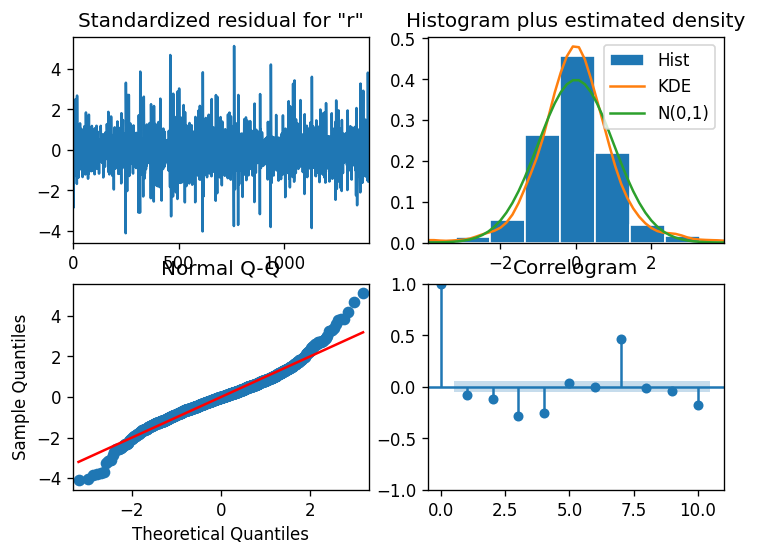

In [55]:
# Construir el modelo ARIMA y ajustarlo a los datos de entrenamiento
model = ARIMA(train, order=(3, 2, 0))
model_fit = model.fit()  # Ajustar el modelo

# Visualizar los gráficos de diagnóstico
model_fit.plot_diagnostics(figsize=(7, 5))
plt.show()

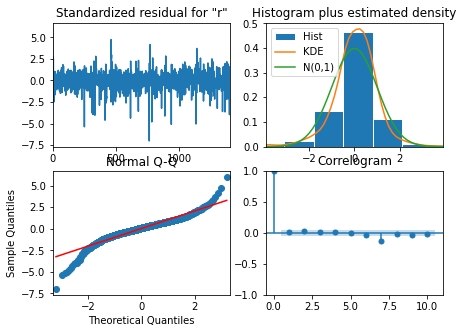

In [18]:
# Construir el modelo ARIMA y ajustarlo a los datos de entrenamiento
model = ARIMA(train, order=(7, 1, 0))
model_fit = model.fit()  # Ajustar el modelo

# Visualizar los gráficos de diagnóstico
model_fit.plot_diagnostics(figsize=(7, 5))
plt.show()

In [ ]:
model = pm.auto_arima(reactiva_inductiva, 
                      start_p=1, start_q=1,
                      test='adf',       # Use adftest to find optimal 'd'
                      max_p=10, max_q=10, # Maximum p and q
                      m=31,              # Frequency of series
                      d=1,           # Let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True
        )
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=27291.402, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=27988.625, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=27715.341, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=27326.353, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=27986.666, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=27291.084, Time=0.50 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=27614.420, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=27278.213, Time=0.72 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=27548.455, Time=0.10 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=27254.179, Time=0.98 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=27478.877, Time=0.13 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=27221.671, Time=0.78 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=27387.565, Time=0.19 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=27024.933, Time=0.76 sec
 ARIMA(6,1,0)(0,0,0

In [19]:
predictions = model_fit.forecast(30)

In [24]:
test.iloc[30]

10700.0

In [22]:
predictions

1403     9578.346879
1404     8840.988143
1405    10489.248719
1406    10804.257798
1407     9981.119163
1408    10054.444478
1409    10340.865508
1410     9806.497774
1411     9498.745354
1412    10253.768290
1413    10405.599314
1414    10053.718220
1415    10083.095821
1416    10185.093566
1417     9930.666304
1418     9802.394320
1419    10149.056530
1420    10223.630743
1421    10074.460128
1422    10085.603506
1423    10118.448943
1424     9996.897012
1425     9943.445500
1426    10103.006818
1427    10140.238946
1428    10077.684154
1429    10081.568017
1430    10089.994464
1431    10031.704269
1432    10009.397794
Name: predicted_mean, dtype: float64

RMSE: 1009.3414390734199
MAE: 783.8638375186605


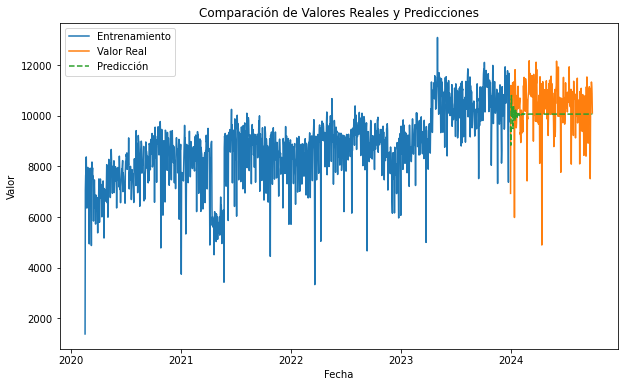

In [25]:
predictions = model_fit.forecast(steps=len(test))
comparison_df = pd.DataFrame({
    'Fecha': test.index,
    'Valor Real': test.values,
    'Predicción': predictions
}).set_index('Fecha')

# Calcular métricas de error
rmse = np.sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Valor Real')
plt.plot(test.index, predictions, label='Predicción', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Comparación de Valores Reales y Predicciones')
plt.legend()
plt.show()

In [28]:
train

date
2020-02-16     1382.0
2020-02-17     7072.0
2020-02-18     7640.0
2020-02-19     7800.0
2020-02-20     8376.0
               ...   
2023-12-26    11008.0
2023-12-27    11680.0
2023-12-28     9768.0
2023-12-29     9944.0
2023-12-30    10704.0
Name: reactiva_inductiva, Length: 1403, dtype: float16

RMSE: 1645.1708011255027
MAE: 1475.4994785486908


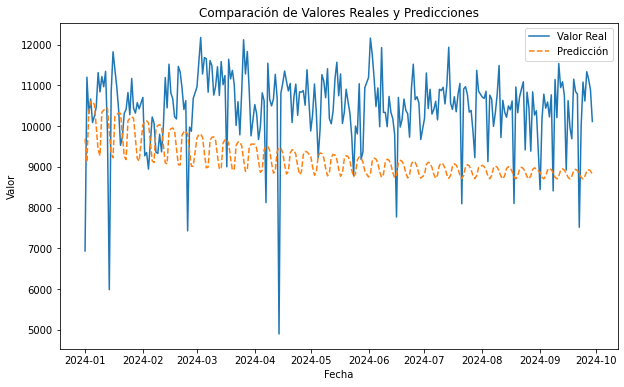

In [24]:
# Calcular métricas de error
rmse = np.sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Graficar los resultados
plt.figure(figsize=(10, 6))
#plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Valor Real')
plt.plot(test.index, predictions, label='Predicción', linestyle='--')
#plt.xlim(['01-01-2024', '01-06-2024'])
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Comparación de Valores Reales y Predicciones')
plt.legend()
plt.show()

/home/javier/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/javier/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/javier/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/javier/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



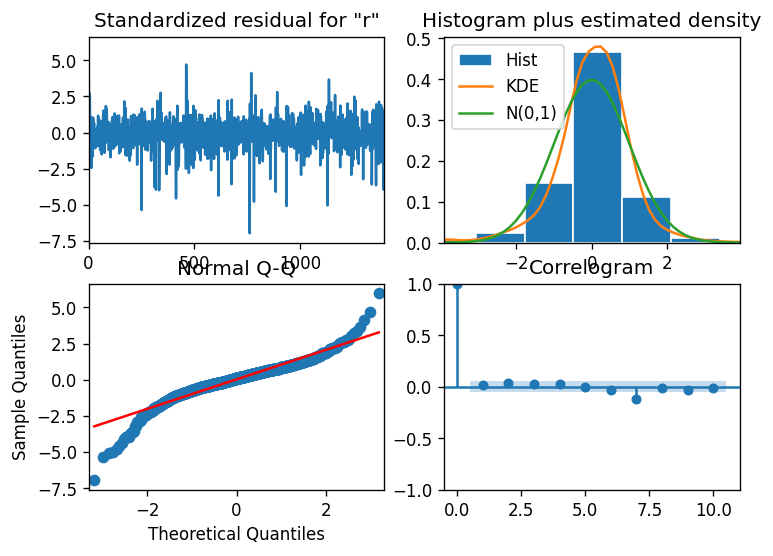

In [67]:
# Construir el modelo ARIMA y ajustarlo a los datos de entrenamiento
model = ARIMA(train, order=(6, 1, 1))
model_fit = model.fit()  # Ajustar el modelo

# Visualizar los gráficos de diagnóstico
model_fit.plot_diagnostics(figsize=(7, 5))
plt.show()

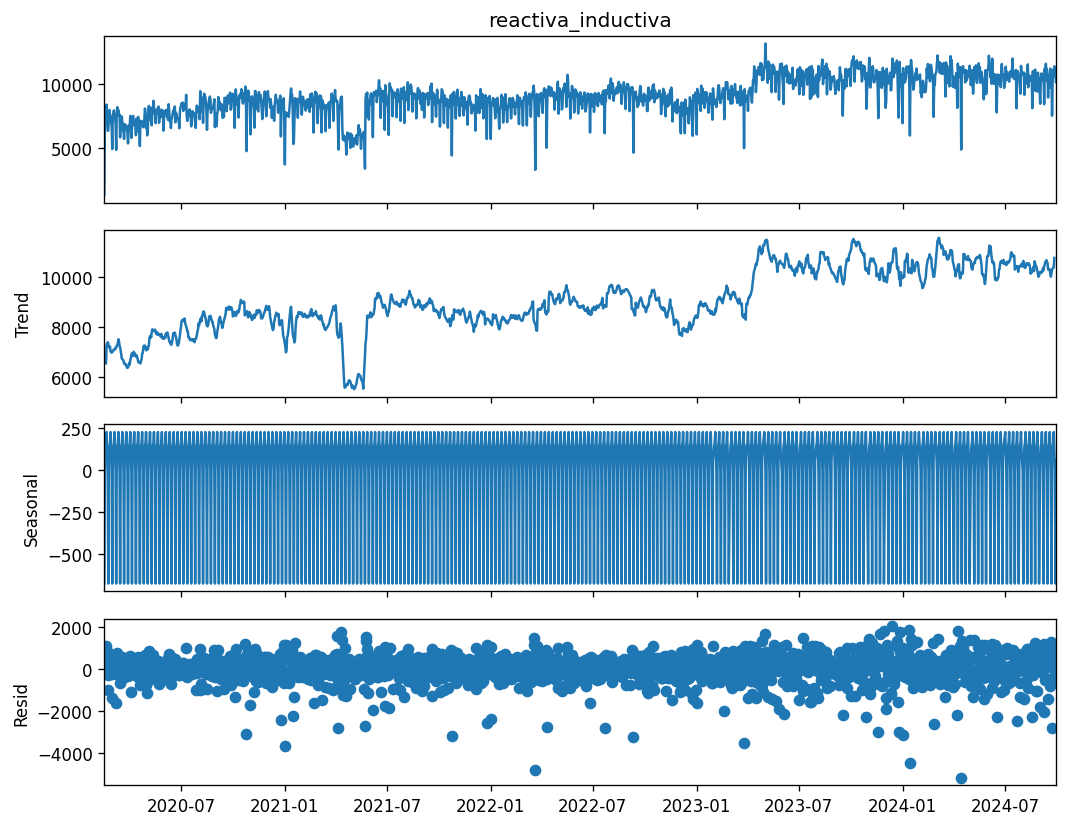

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose


reactiva_inductiva.index = pd.to_datetime(reactiva_inductiva.index)

# Prueba con diferentes periodos para observar la estacionalidad
# Por ejemplo, para detectar estacionalidad semanal (m=7)
decomposition = seasonal_decompose(reactiva_inductiva, model='additive', period=7)
decomposition.plot()
plt.show()

In [ ]:
# grid search ARIMA parameters for time series
import warnings
from math import sqrt
from pandas import read_csv

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(reactiva_inductiva, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=1941.182
ARIMA(0, 0, 1) RMSE=1491.094
ARIMA(0, 1, 0) RMSE=1118.257


In [19]:
import warnings
from math import sqrt
import pmdarima as pm
from sklearn.metrics import mean_squared_error
from joblib import Parallel, delayed  # Para procesamiento paralelo

# Función para evaluar un modelo ARIMA con auto_arima de pmdarima
def evaluate_arima_model_auto(X, p, d, q):
    # Separar en conjunto de entrenamiento y prueba
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    
    # Ajuste usando auto_arima con búsqueda stepwise
    model = pm.auto_arima(train, start_p=p, start_q=q, d=d,
                          max_p=p, max_q=q,
                          seasonal=False, trace=False,
                          error_action='ignore', 
                          suppress_warnings=True,
                          stepwise=True, maxiter=10)
    
    # Predecir en el conjunto de prueba
    predictions = model.predict(n_periods=len(test))
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse, (p, d, q)

# Función para evaluar múltiples combinaciones de p, d, q en paralelo
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    
    # Usar procesamiento paralelo para probar cada combinación
    results = Parallel(n_jobs=-1)(delayed(evaluate_arima_model_auto)(dataset, p, d, q) 
                                  for p in p_values for d in d_values for q in q_values)
    
    # Evaluar los resultados
    for rmse, order in results:
        if rmse < best_score:
            best_score, best_cfg = rmse, order
        print('ARIMA%s RMSE=%.3f' % (order, rmse))
    
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# Valores de p, d y q para evaluar
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 1)
q_values = range(0, 10)
warnings.filterwarnings("ignore")

# Ejecutar la búsqueda de parámetros
evaluate_models(reactiva_inductiva, p_values, d_values, q_values)


/home/javier/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/javier/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/javier/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/javier/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exceptio

ARIMA(0, 0, 0) RMSE=2289.338
ARIMA(0, 0, 1) RMSE=2287.200
ARIMA(0, 0, 2) RMSE=2284.978
ARIMA(0, 0, 3) RMSE=2277.436
ARIMA(0, 0, 4) RMSE=2276.047
ARIMA(0, 0, 5) RMSE=2276.047
ARIMA(0, 0, 6) RMSE=2268.352
ARIMA(0, 0, 7) RMSE=2266.510
ARIMA(0, 0, 8) RMSE=2263.536
ARIMA(0, 0, 9) RMSE=2262.354
ARIMA(1, 0, 0) RMSE=2287.954
ARIMA(1, 0, 1) RMSE=2787.990
ARIMA(1, 0, 2) RMSE=2787.990
ARIMA(1, 0, 3) RMSE=2270.870
ARIMA(1, 0, 4) RMSE=5087.804
ARIMA(1, 0, 5) RMSE=4565.059
ARIMA(1, 0, 6) RMSE=4939.148
ARIMA(1, 0, 7) RMSE=5787.495
ARIMA(1, 0, 8) RMSE=4984.286
ARIMA(1, 0, 9) RMSE=4758.327
ARIMA(2, 0, 0) RMSE=2293.933
ARIMA(2, 0, 1) RMSE=2376.836
ARIMA(2, 0, 2) RMSE=2347.963
ARIMA(2, 0, 3) RMSE=2347.963
ARIMA(2, 0, 4) RMSE=4222.265
ARIMA(2, 0, 5) RMSE=2027.020
ARIMA(2, 0, 6) RMSE=2027.020
ARIMA(2, 0, 7) RMSE=3608.734
ARIMA(2, 0, 8) RMSE=4601.860
ARIMA(2, 0, 9) RMSE=2603.134
ARIMA(4, 0, 0) RMSE=2298.253
ARIMA(4, 0, 1) RMSE=6610.244
ARIMA(4, 0, 2) RMSE=6610.244
ARIMA(4, 0, 3) RMSE=2347.963
ARIMA(4, 0, 4)

/home/javier/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/javier/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


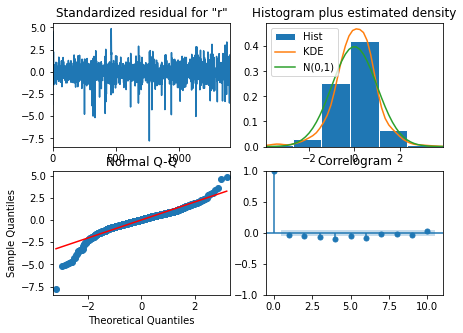

In [21]:
# Construir el modelo ARIMA y ajustarlo a los datos de entrenamiento
model = ARIMA(train, order=(10, 0, 6))
model_fit = model.fit()  # Ajustar el modelo

# Visualizar los gráficos de diagnóstico
model_fit.plot_diagnostics(figsize=(7, 5))
plt.show()

RMSE: 1645.1708011255027
MAE: 1475.4994785486908


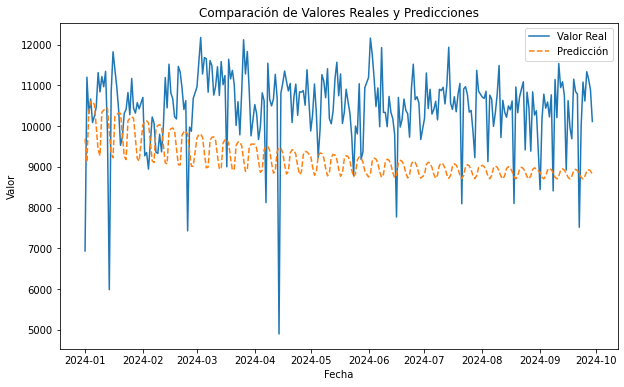

In [23]:
predictions = model_fit.forecast(steps=len(test))
comparison_df = pd.DataFrame({
    'Fecha': test.index,
    'Valor Real': test.values,
    'Predicción': predictions
}).set_index('Fecha')

# Calcular métricas de error
rmse = np.sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Graficar los resultados
plt.figure(figsize=(10, 6))
#plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Valor Real')
plt.plot(test.index, predictions, label='Predicción', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Comparación de Valores Reales y Predicciones')
plt.legend()
plt.show()

## Deep Learning

In [90]:
train_set = df[:'2023'].iloc[:,3:4].values
test_set = df['2024':].iloc[:,3:4].values

In [88]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_set)

In [89]:
look_back = 10
X_train, y_train = create_dataset(training_set_scaled, look_back)
print(X_train.shape)
print(y_train.shape)

(1393, 10)
(1393,)


### Grafico completo de serie

In [92]:
import plotly.graph_objects as go

# Definir los datos para el conjunto de entrenamiento y prueba
training_data = df["reactiva_inductiva"][:'2023']
test_data = df["reactiva_inductiva"]['2024':]

# Crear la figura
fig = go.Figure()

# Añadir la serie de datos del conjunto de entrenamiento
fig.add_trace(go.Scatter(
    x=training_data.index,
    y=training_data.values,
    mode='lines',
    name='Training set (Before 2024)'
))

# Añadir la serie de datos del conjunto de prueba
fig.add_trace(go.Scatter(
    x=test_data.index,
    y=test_data.values,
    mode='lines',
    name='Test set (2024 and beyond)'
))

# Configurar el diseño del gráfico
fig.update_layout(
    title="Energía reactiva inductiva de EPM",
    xaxis_title="Date",
    yaxis_title="Reactiva Inductiva",
    legend=dict(title="Data"),
    width=1000, # Ajustar el ancho en lugar de figsize
    height=400,
    xaxis_rangeslider_visible=True
)

# Mostrar el gráfico
fig.show()

## definiendo

In [94]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.3))
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train.reshape(X_train.shape[0],look_back,1),y_train,epochs=50,batch_size=32)

Epoch 1/50


2024-11-13 20:01:09.003585: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1084
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0130
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0126
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0110
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0107
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0106
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0095
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0094
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0092
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0092
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0088
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0084
Epoch 13/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0094
Epoch 14/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0087
Epoch 15/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0080
Epoch 16/50
44/44 ━━━━━━━━━━━━

In [95]:
# The RNN architecture
model = Sequential()
# First RNN layer with Dropout regularisation
model.add(SimpleRNN(units=50,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
# The output layer
model.add(Dense(units=1))

In [96]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)